In [1]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

df = pd.read_excel("datos/Clasificación_GPT-4o-mini-Completo.xlsx")

In [2]:
columnas_pred = [col for col in df.columns if "Polarity_" in col and col != "Polarity"]

In [3]:
def calcular_metricas(y_true, y_pred, clases=["NEG", "NEU", "POS"]):
    report = classification_report(y_true, y_pred, labels=clases, output_dict=True, zero_division=0)
    accuracy = accuracy_score(y_true, y_pred)
    metricas_clase = {
        clase: {
            "precision": report[clase]["precision"],
            "recall": report[clase]["recall"],
            "f1-score": report[clase]["f1-score"]
        } for clase in clases
    }
    return {
        "accuracy": accuracy,
        "f1-score": report["weighted avg"]["f1-score"],
        "metricas_por_clase": metricas_clase
    }

In [4]:
def crear_tabla_metricas(df_modelo, columnas_pred):
    filas = []
    for col in columnas_pred:
        prompt = col.split("_")[-1]
        y_true = df_modelo["Polarity"]
        y_pred = df_modelo[col]
        valid = y_true.isin(["NEG", "NEU", "POS"]) & y_pred.isin(["NEG", "NEU", "POS"])
        y_true = y_true[valid]
        y_pred = y_pred[valid]
        m = calcular_metricas(y_true, y_pred)
        filas.append({
            "Prompt": prompt,
            "Accuracy": round(m["accuracy"], 3),
            "F1-score": round(m["f1-score"], 3),
            "F1-NEG": round(m["metricas_por_clase"]["NEG"]["f1-score"], 3),
            "F1-NEU": round(m["metricas_por_clase"]["NEU"]["f1-score"], 3),
            "F1-POS": round(m["metricas_por_clase"]["POS"]["f1-score"], 3),
        })
    return pd.DataFrame(filas)

In [5]:

def graficar_prompts(df_metricas, modelo):
    df_plot = df_metricas.set_index("Prompt")[["Accuracy", "F1-score"]]
    df_plot.plot(kind="bar", title=f"Comparativa de Prompts en {modelo}", figsize=(8, 5))
    plt.ylim(0, 1)
    plt.grid(axis="y")
    plt.ylabel("Valor")
    plt.tight_layout()
    plt.show()

     Prompt  Accuracy  F1-score  F1-NEG  F1-NEU  F1-POS
0  ZeroShot     0.731     0.747   0.804   0.383   0.814
1   FewShot     0.726     0.737   0.835   0.364   0.754
2   Thought     0.744     0.748   0.820   0.342   0.813


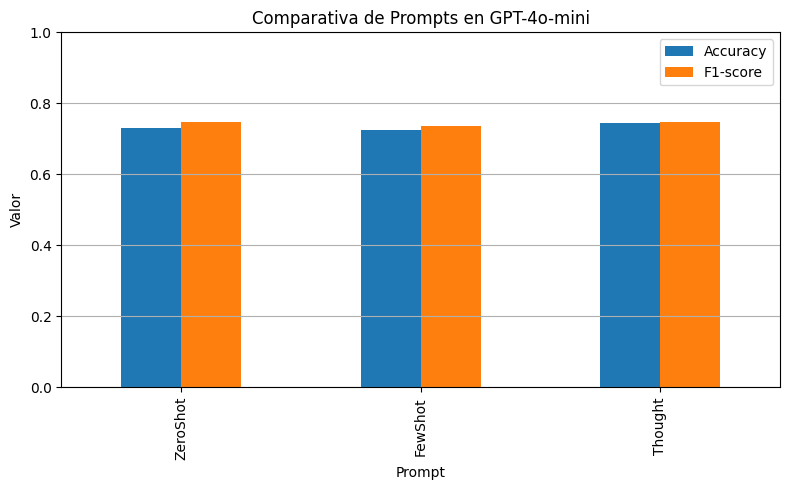

In [6]:
tabla = crear_tabla_metricas(df, columnas_pred)
print(tabla)
graficar_prompts(tabla, modelo="GPT-4o-mini")